In [1]:
import os
import requests
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
pool_address = "0x59bf0545fca0e5ad48e13da269facd2e8c886ba4"
start_block = 5695011
pool_address.lower()

'0x59bf0545fca0e5ad48e13da269facd2e8c886ba4'

In [3]:
api = "https://api.thegraph.com/subgraphs/name/convex-community/volume-arbitrum"
query = """
{
  hourlySwapVolumeSnapshots(
    first: 1000,
    orderBy: timestamp,
    orderDirection: desc,
    where: {
      pool: "0x59bf0545fca0e5ad48e13da269facd2e8c886ba4"
    }
  )
  {
    timestamp
    volumeUSD
  }
}
"""
r = requests.post(api, json={'query': query})
data = dict(r.json())
timestamps = [int(i['timestamp']) for i in data['data']['hourlySwapVolumeSnapshots']]
timestamps = [datetime.datetime.fromtimestamp(i) for i in timestamps]

In [4]:
data = pd.DataFrame(data['data']['hourlySwapVolumeSnapshots'])
data['volumeUSD'] = data.volumeUSD.astype(float)
timestamps = [datetime.datetime.fromtimestamp(int(i)) for i in data.timestamp]
data['timestamp'] = timestamps
data.set_index('timestamp', inplace=True)
data.sort_index(ascending=True, inplace=True)
data

,volumeUSD
timestamp,
2022-02-09 06:00:00,315922.632871
2022-02-09 07:00:00,306077.115572
2022-02-09 08:00:00,30489.200733
2022-02-09 09:00:00,140547.950025
2022-02-09 10:00:00,27514.237668
...,...
2022-02-24 13:00:00,14695.431217
2022-02-24 14:00:00,87.781752
2022-02-24 15:00:00,40927.704869


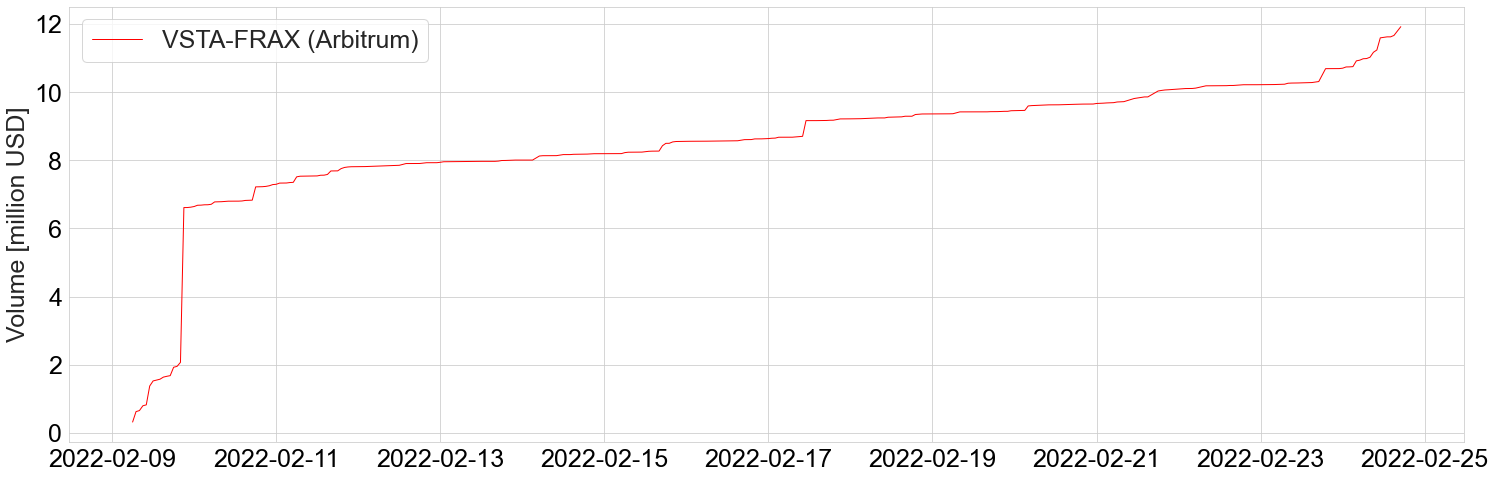

In [5]:
fig, ax = plt.subplots(1,1, figsize=(25, 8))

ax.plot(
    data.index,
    data.volumeUSD.cumsum() * 1e-6,
    color='red',
    label='VSTA-FRAX (Arbitrum)',
    lw=1
)

ax.set_ylabel("Volume [million USD]", fontsize=25)
ax.set_xlabel("", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25);